In [1]:
pip install tensorflow scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0 

In [4]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),

    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - accuracy: 0.2346 - loss: 1.9827 - val_accuracy: 0.4119 - val_loss: 1.5497
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.4218 - loss: 1.5457 - val_accuracy: 0.5072 - val_loss: 1.3495
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.4925 - loss: 1.3816 - val_accuracy: 0.5639 - val_loss: 1.2208
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.5398 - loss: 1.2616 - val_accuracy: 0.5841 - val_loss: 1.1356
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.5678 - loss: 1.1991 - val_accuracy: 0.6067 - val_loss: 1.0805
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.5945 - loss: 1.1338 - val_accuracy: 0.6261 - val_loss: 1.0484
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6137 - loss: 1.0800 - val_accuracy: 0.6443 - val_loss: 0.9922
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.6281 - loss: 1.0438 - 

In [7]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6693 - loss: 0.9361
Test Accuracy: 66.41%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


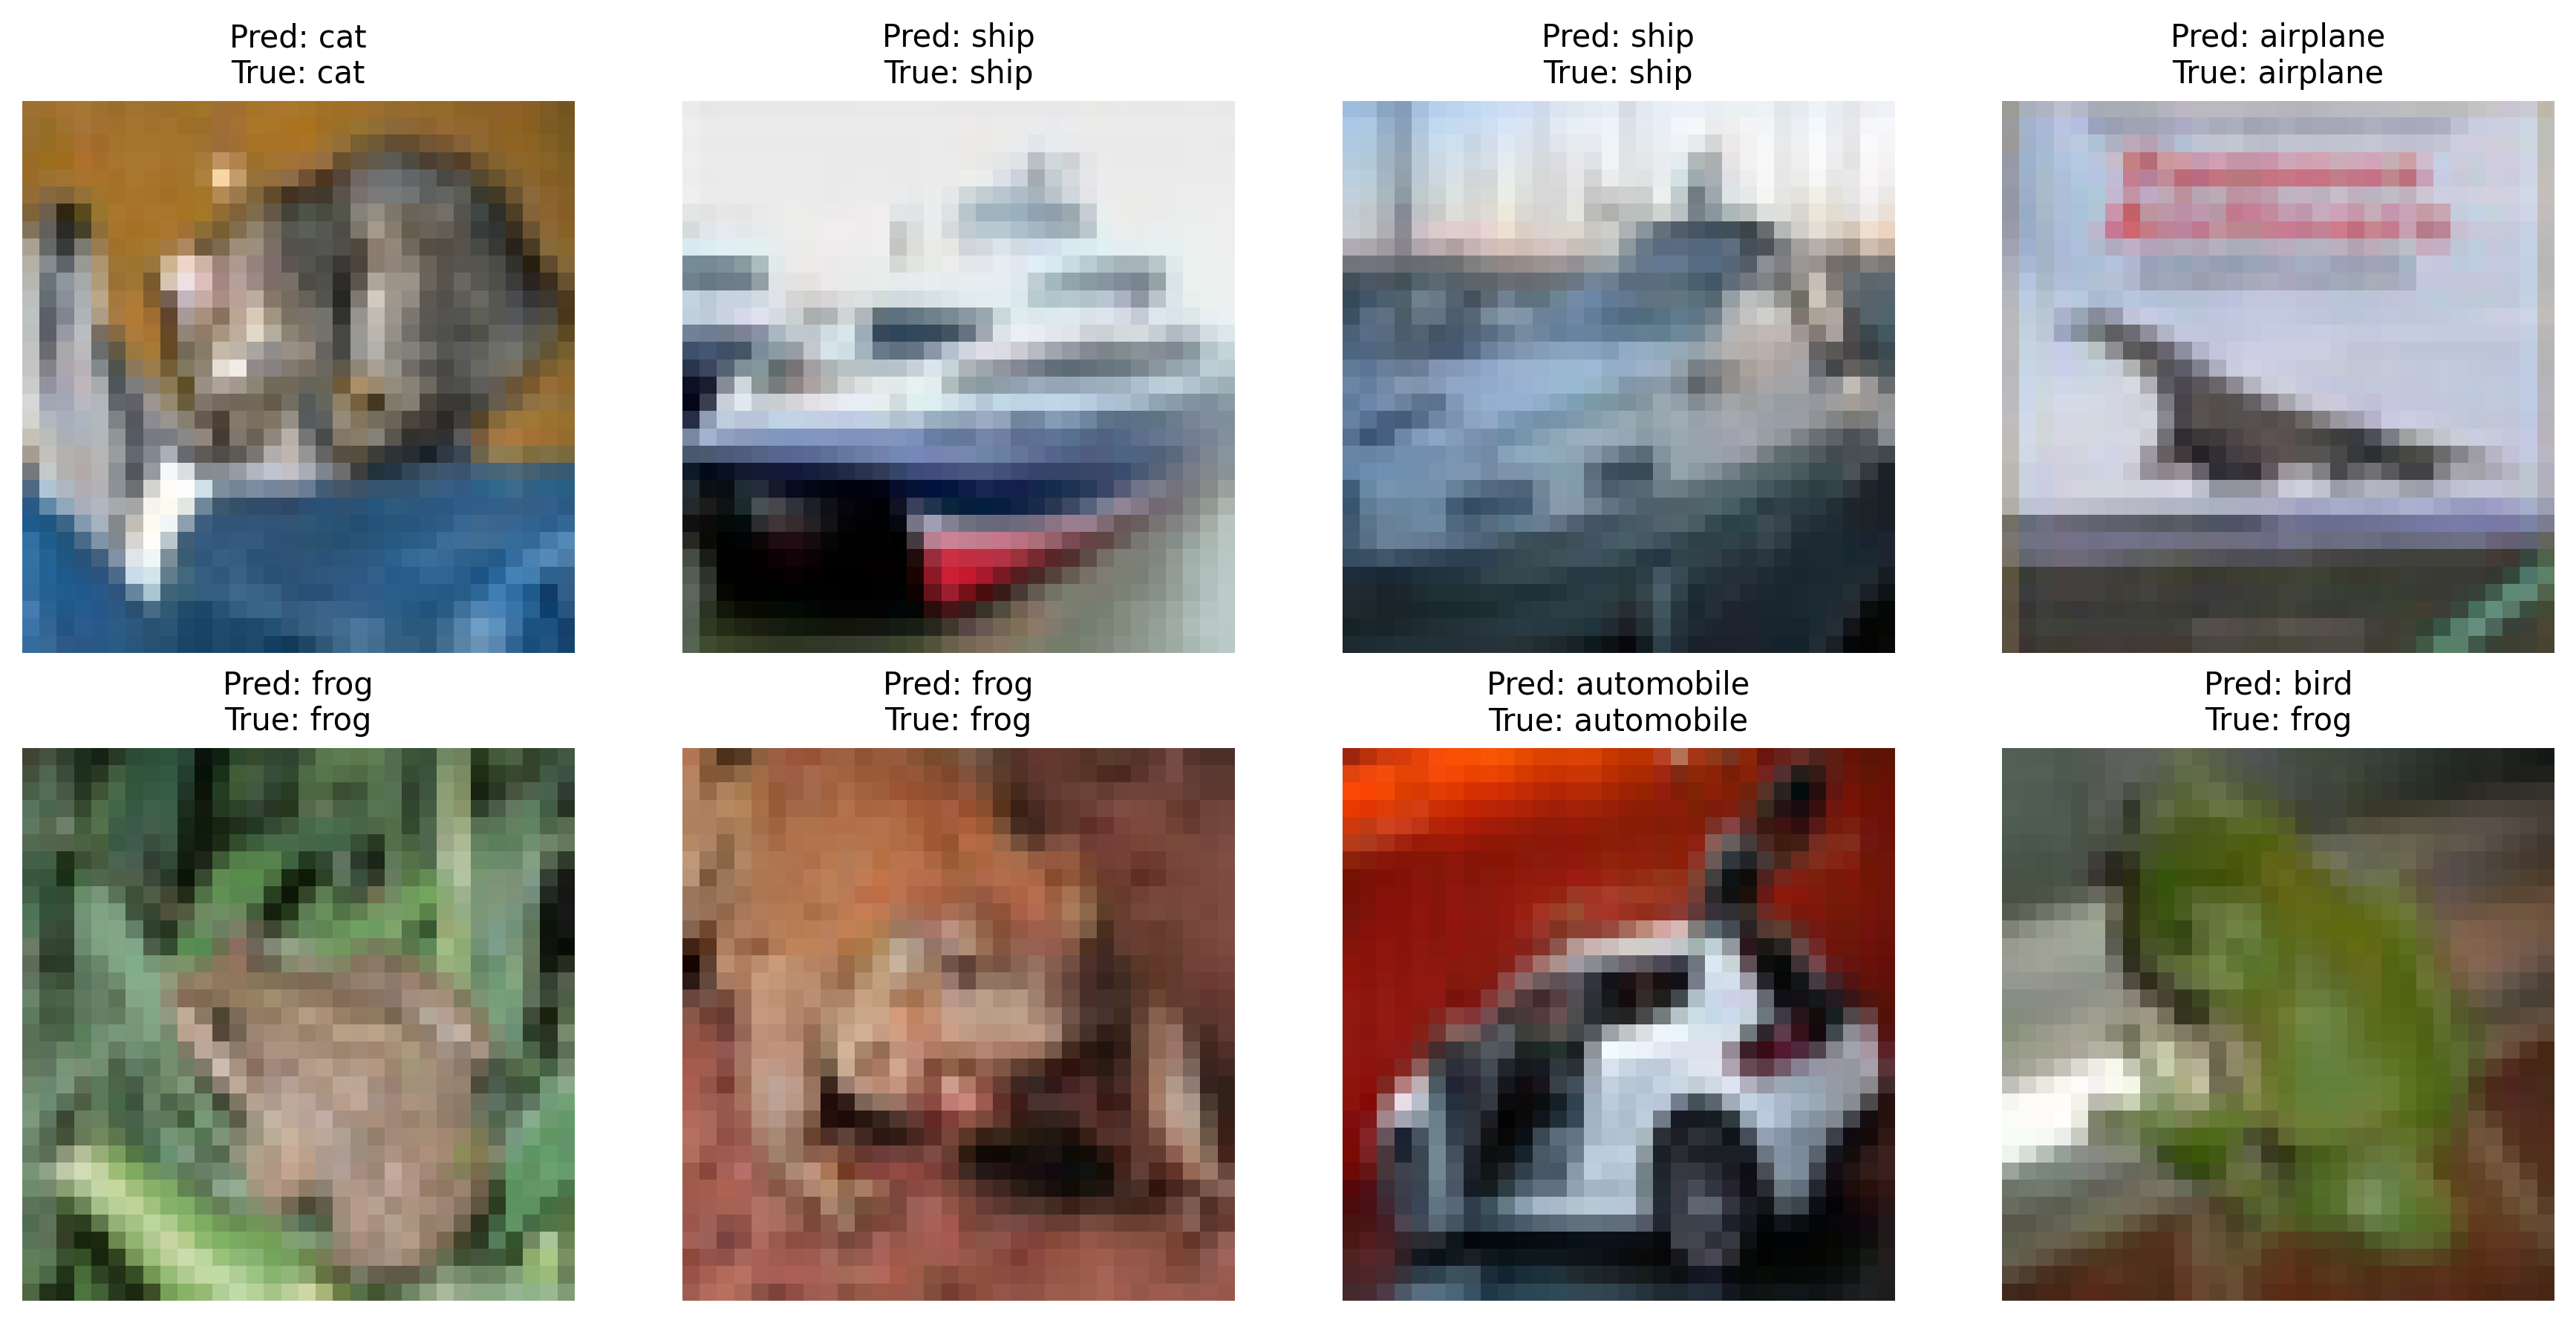

In [8]:
plt.figure(figsize=(12, 6), dpi=300)  
predictions = model.predict(x_test[:8])

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_test[i], interpolation='nearest')
    predicted_class = predictions[i].argmax()
    true_class = y_test[i][0]
    plt.title(f'Pred: {cifar10_class_names[predicted_class]}\nTrue: {cifar10_class_names[true_class]}',
              fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


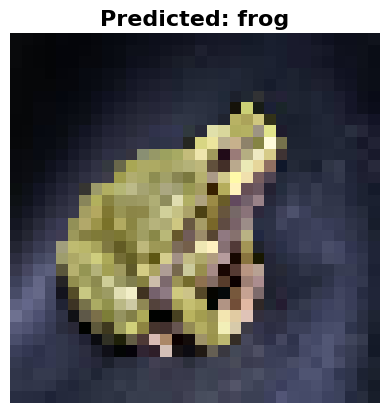

Predicted class: frog (Confidence: 0.96)


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def classify_image(model, image_path):
    img = load_img(image_path, target_size=(32, 32))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = cifar10_class_names[predicted_class_index]

    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}", fontsize=16, fontweight="bold")
    plt.axis('off')
    plt.show()

    print(f"Predicted class: {predicted_class_name} (Confidence: {predictions[0][predicted_class_index]:.2f})")

image_path = "C:/Users/menak/CV/frog-img.jpeg" 
classify_image(model, image_path)